# Tools and data preparation

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import geopandas as gpd
from scipy.stats import chi2_contingency

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
airbnb = pd.read_csv('/content/drive/MyDrive/Purwadhika/Airbnb Listings Bangkok.csv', quotechar='"', engine='python')

In [165]:
# Cek data type
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [166]:
airbnb

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [167]:
# totalkan data null
airbnb_na_count = airbnb.isna().sum()

# Menampilkan jumlah nilai null di setiap kolom
print(airbnb_na_count)

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


In [168]:
# CLEANSING DATA

# Hapus unnamed:0 karena tidak perlu
airbnb_bangkok = airbnb.drop(columns=["Unnamed: 0"], errors='ignore')

# Drop kolom host_name
# Name tidak didrop karena hanya judul posting properti
airbnb_bangkok = airbnb_bangkok.dropna(subset=["host_name"])

# last_review & reviews_per_month tidak didrop karena bisa diganti jadi no preview dan 0
airbnb_bangkok['last_review'] = airbnb_bangkok['last_review'].fillna('No review')
airbnb_bangkok['reviews_per_month'] = airbnb_bangkok['reviews_per_month'].fillna(0)

# Hapus duplikat row jika ada
airbnb_bangkok = airbnb_bangkok.drop_duplicates()

# Save clean data
airbnb_bangkok.to_csv('Clean Airbnb Listings Bangkok.csv', index=False)

In [169]:
airbnb_bangkok

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,No review,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,No review,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,No review,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,No review,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,No review,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,No review,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,No review,0.00,14,365,0


In [170]:
# test pencarian, apakah split text sesuai
test = airbnb_bangkok[airbnb_bangkok['id']==12281386]
test

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1880,12281386,Best location \n650m :BTS Tonglor \n1 km :Emqu...,37363663,Puncharee,Vadhana,13.7295,100.57613,Private room,1064,30,1,2022-10-26,0.47,1,315,1


# Data Understanding

In [171]:
# RANGE PENARIKAN DATA

# ganti 'No review' dengan NaT (Not a Time)
airbnb_bangkok['last_review'] = pd.to_datetime(airbnb_bangkok['last_review'], errors='coerce')

# show data terbaru
tanggal_terbaru = airbnb_bangkok.sort_values(by='last_review', ascending=False)['last_review'].iloc[0]

# show data terlama
tanggal_terlama = airbnb_bangkok.sort_values(by='last_review', ascending=True)['last_review'].iloc[0]

print(f"Tanggal terbaru: {tanggal_terbaru}")
print(f"Tanggal terlama: {tanggal_terlama}")

Tanggal terbaru: 2022-12-28 00:00:00
Tanggal terlama: 2012-12-15 00:00:00


In [172]:
#  Data statistik berdasarkan room type
room_type_stats = airbnb_bangkok.groupby('room_type')['price'].describe()
room_type_stats

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,8912.0,3465.474529,30076.447369,332.0,1028.0,1536.0,2571.0,1100000.0
Hotel room,649.0,3028.309707,12015.858835,0.0,995.0,1700.0,3170.0,300000.0
Private room,5769.0,3064.892356,17297.357384,278.0,800.0,1212.0,2093.0,600700.0
Shared room,523.0,919.757170,2147.960499,280.0,390.0,500.0,650.0,31200.0


In [173]:
#  Data statistik berdasarkan Neighbourhood
neighbourhood_stats = airbnb_bangkok.groupby('neighbourhood')['price'].describe()
neighbourhood_stats.head()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Bang Bon,5.0,1504.400000,788.261885,790.0,900.00,1200.0,2000.00,2632.0
Bang Kapi,259.0,3088.532819,26663.772514,320.0,600.00,914.0,1600.00,429443.0
Bang Khae,92.0,1849.739130,2284.395257,350.0,680.00,911.0,2075.00,12000.0
Bang Khen,116.0,2194.689655,6638.194382,400.0,637.50,882.0,1517.75,50000.0
Bang Kho laen,140.0,2408.114286,3018.432863,499.0,861.25,1265.0,2492.25,14630.0


In [174]:
# List region
airbnb_bangkok['neighbourhood'].unique()
print(airbnb_bangkok['neighbourhood'].nunique())

50


In [175]:
# Define neighbourhood menjadi wilayah geografis
def get_neighbourhood_group(neighbourhood):
    # Central Bangkok
    if neighbourhood in ['Phra Nakhon', 'Dusit', 'Parthum Wan', 'Ratchathewi', 'Bang Rak', 'Khlong San',
                         'Pom Prap Sattru Phai', 'Samphanthawong','Din Daeng','Phaya Thai'  ,'Huai Khwang','Bang Sue','Vadhana',]:
        return 'Central Bangkok'

    # Northern Bangkok
    elif neighbourhood in ['Chatu Chak', 'Bang Khen', 'Don Mueang', 'Lak Si', 'Sai Mai','Khlong Sam Wa']:
        return 'Northern Bangkok'

    # Northeastern Bangkok
    elif neighbourhood in ['Lat Phrao', 'Wang Thong Lang', 'Bueng Kum', 'Khan Na Yao','Pra Wet']:
        return 'Northeastern Bangkok'

    # Eastern Bangkok
    elif neighbourhood in ['Min Buri', 'Nong Chok', 'Lat Krabang']:
        return 'Eastern Bangkok'

    # Western Bangkok
    elif neighbourhood in ['Thon buri', 'Bangkok Yai', 'Bangkok Noi', 'Taling Chan', 'Bang Khae', 'Bang Phlat',
                           'Nong Khaem','Phasi Charoen', 'Bang Bon', 'Bang Khun thain', 'Chom Thong', 'Thawi Watthana']:
        return 'Western Bangkok'

    # Southern Bangkok
    elif neighbourhood in ['Khlong Toei', 'Watthana', 'Yan na wa', 'Bang Kho laen', 'Sathon', 'Bang Na',
                           'Phra Khanong', 'Suanluang', 'Prawet', 'Rat Burana','Thung khru','Bang Kapi', 'Saphan Sung']:
        return 'Southern Bangkok'

    # If the neighbourhood does not match any of the above, return 'Other'
    else:
        return 'Other'

In [176]:
# Apply the function to create the new column 'neighbourhood_group'
airbnb_bangkok['neighbourhood_group'] = airbnb_bangkok['neighbourhood'].apply(get_neighbourhood_group)

print(airbnb_bangkok[['neighbourhood', 'neighbourhood_group']].head())

  neighbourhood neighbourhood_group
0   Ratchathewi     Central Bangkok
1       Bang Na    Southern Bangkok
2     Bang Kapi    Southern Bangkok
3     Din Daeng     Central Bangkok
4     Bang Kapi    Southern Bangkok


In [177]:
airbnb_bangkok.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_group
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0,Central Bangkok


In [178]:
# count neighbourhood

Count_neighbourhood_group = airbnb_bangkok['neighbourhood_group'].value_counts(ascending=False)
Count_neighbourhood_group

,count
neighbourhood_group,
Central Bangkok,8094
Southern Bangkok,5024
Western Bangkok,1059
Northern Bangkok,1029
Northeastern Bangkok,422
Eastern Bangkok,225


In [179]:
# e. Number of room types per neighbourhood group
room_type_per_neighbourhood_group = airbnb_bangkok.groupby('neighbourhood_group')['room_type'].value_counts()
room_type_per_neighbourhood_group

neighbourhood_group   room_type      
Central Bangkok       Entire home/apt    4424
                      Private room       2798
                      Hotel room          476
                      Shared room         396
Eastern Bangkok       Private room        121
                      Entire home/apt      73
                      Shared room          17
                      Hotel room           14
Northeastern Bangkok  Private room        231
                      Entire home/apt     177
                      Shared room           9
                      Hotel room            5
Northern Bangkok      Private room        559
                      Entire home/apt     435
                      Hotel room           20
                      Shared room          15
Southern Bangkok      Entire home/apt    3288
                      Private room       1551
                      Hotel room          121
                      Shared room          64
Western Bangkok       Entire home/apt     515
                      Private room        509
                      Shared room          22
                      Hotel room           13
Name: count, dtype: int64

In [180]:
# h. Create Days_Occupancy column
airbnb_bangkok['Days_Occupancy'] = airbnb_bangkok['number_of_reviews_ltm'] * airbnb_bangkok['minimum_nights']

# i. Create Profit_Estimation column
airbnb_bangkok['Profit_Estimation'] = (365 - airbnb_bangkok['availability_365']) * airbnb_bangkok['price']

airbnb_bangkok.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_group,Days_Occupancy,Profit_Estimation
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0,Central Bangkok,0,22860


# Data Visualization

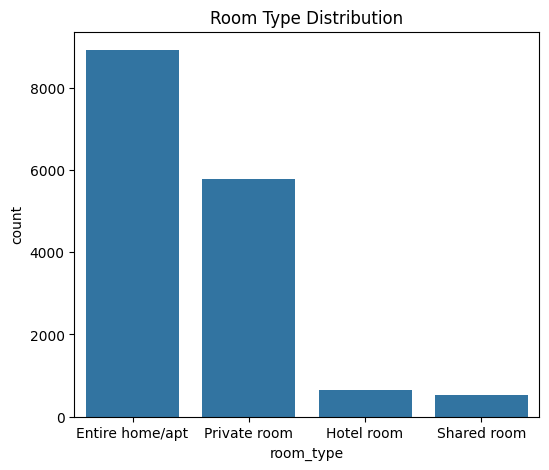

In [181]:
# a. Room type visualizations
plt.figure(figsize=(6,5))
sns.countplot(data=airbnb_bangkok, x='room_type')
plt.title('Room Type Distribution')
plt.show()

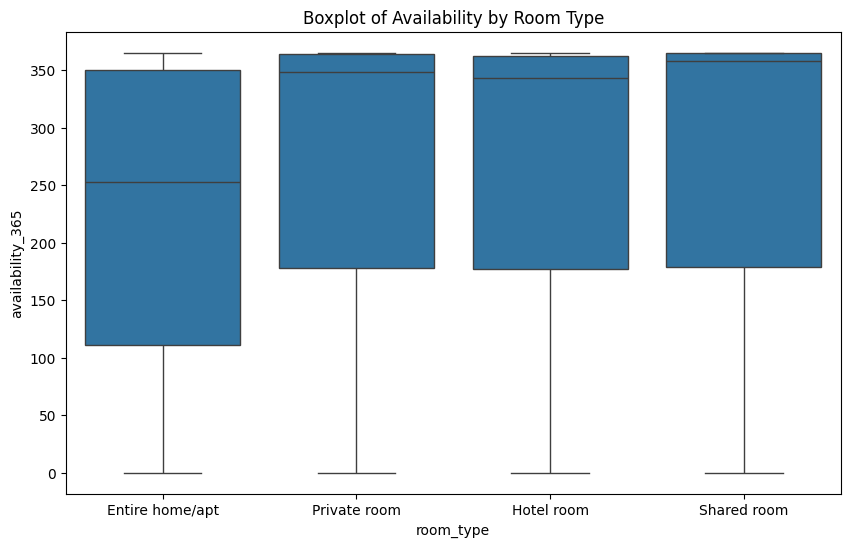

In [182]:
plt.figure(figsize=(10,6))
sns.boxplot(data=airbnb_bangkok, x='room_type', y='availability_365')
plt.title('Boxplot of Availability by Room Type')
plt.show()

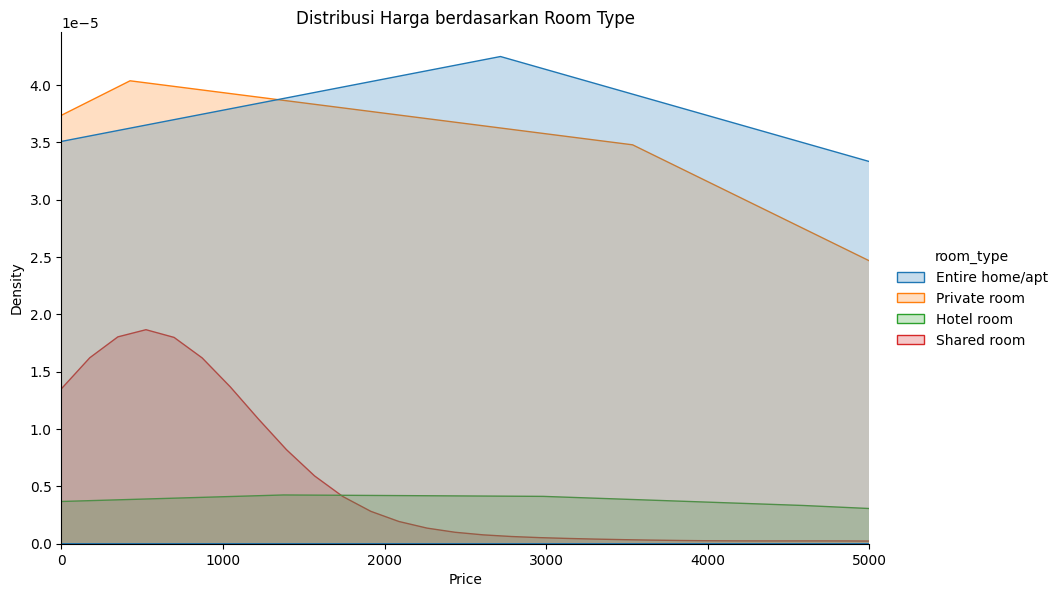

In [183]:
# Plot distribusi harga untuk tiap tipe kamar
sns.displot(
    data=airbnb_bangkok,
    x='price',
    hue='room_type',
    kind='kde',
    fill=True,
    height=6,
    aspect=1.5
)

plt.title('Distribusi Harga berdasarkan Room Type')
plt.xlabel('Price')
plt.ylabel('Density')
plt.xlim(0, 5000)  # Batasi agar distribusi tidak terlalu melebar oleh outlier
plt.show()

# GANTI PLOT DISTRIBUSI

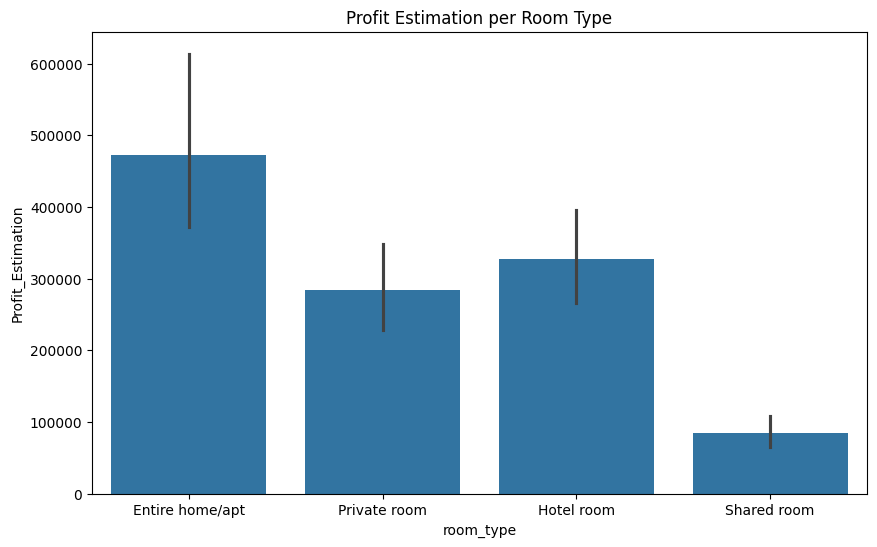

In [184]:
plt.figure(figsize=(10,6))
sns.barplot(data=airbnb_bangkok, x='room_type', y='Profit_Estimation')
plt.title('Profit Estimation per Room Type')
plt.show()

Room type:
- kuantitas entire home/apt terbanyak
- entire home/apt paling laku dengan availability lebih rendah
- entire home/apt variabilitas harganya sangat tinggi, menunjukkan harga tidak konsisten
- estimasi profit yang didapat paling tinggi entire home/apt

Airbnb bisa memaksimalkan profit dengan fokus di entire home/apt

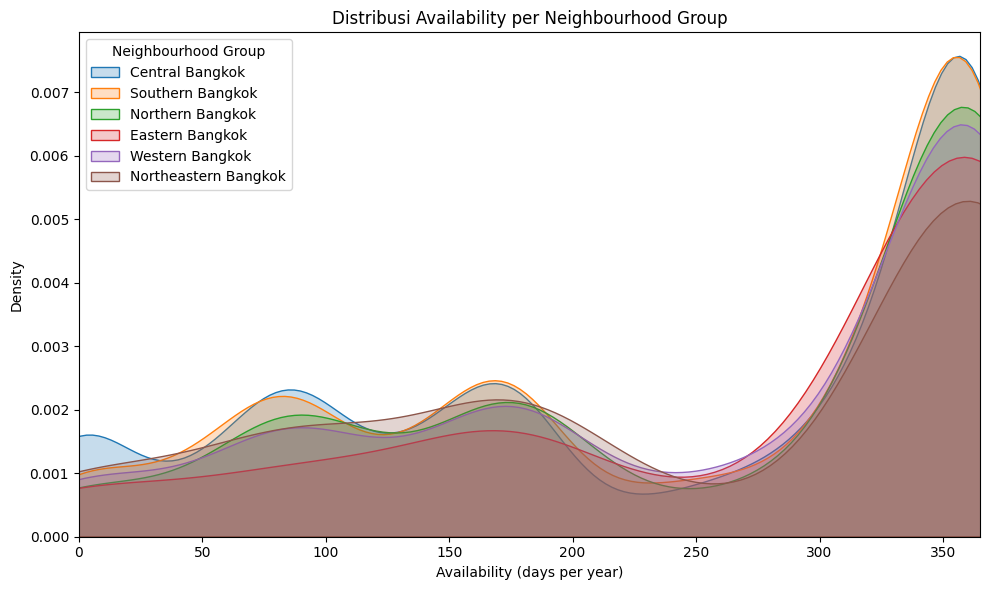

In [185]:
# Neighbourhood

plt.figure(figsize=(10, 6))

# Membuat KDE plot untuk setiap group
for group in airbnb_bangkok['neighbourhood_group'].unique():
    subset = airbnb_bangkok[airbnb_bangkok['neighbourhood_group'] == group]
    sns.kdeplot(subset['availability_365'], label=group, fill=True)

plt.title('Distribusi Availability per Neighbourhood Group')
plt.xlabel('Availability (days per year)')
plt.ylabel('Density')
plt.legend(title='Neighbourhood Group')
plt.xlim(0, 365)  # Opsional untuk membatasi sumbu X
plt.tight_layout()
plt.show()

# PAKAI DISTRIBUSI DAN GROUPING NEIGHBOURHOOD

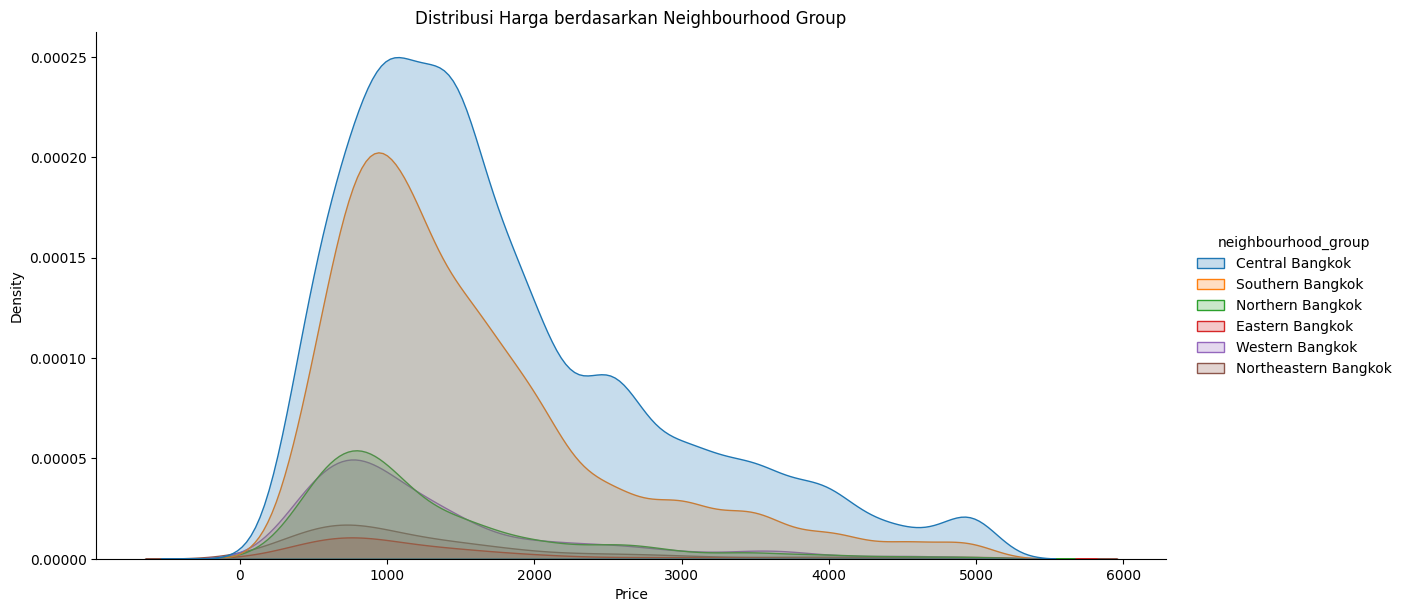

In [186]:
sns.displot(
    data=airbnb_bangkok[airbnb_bangkok['price'] <= 5000],  # filter outlier
    x='price',
    hue='neighbourhood_group',
    kind='kde',
    fill=True,
    height=6,
    aspect=2
)

plt.title('Distribusi Harga berdasarkan Neighbourhood Group')
plt.xlabel('Price')
plt.show()

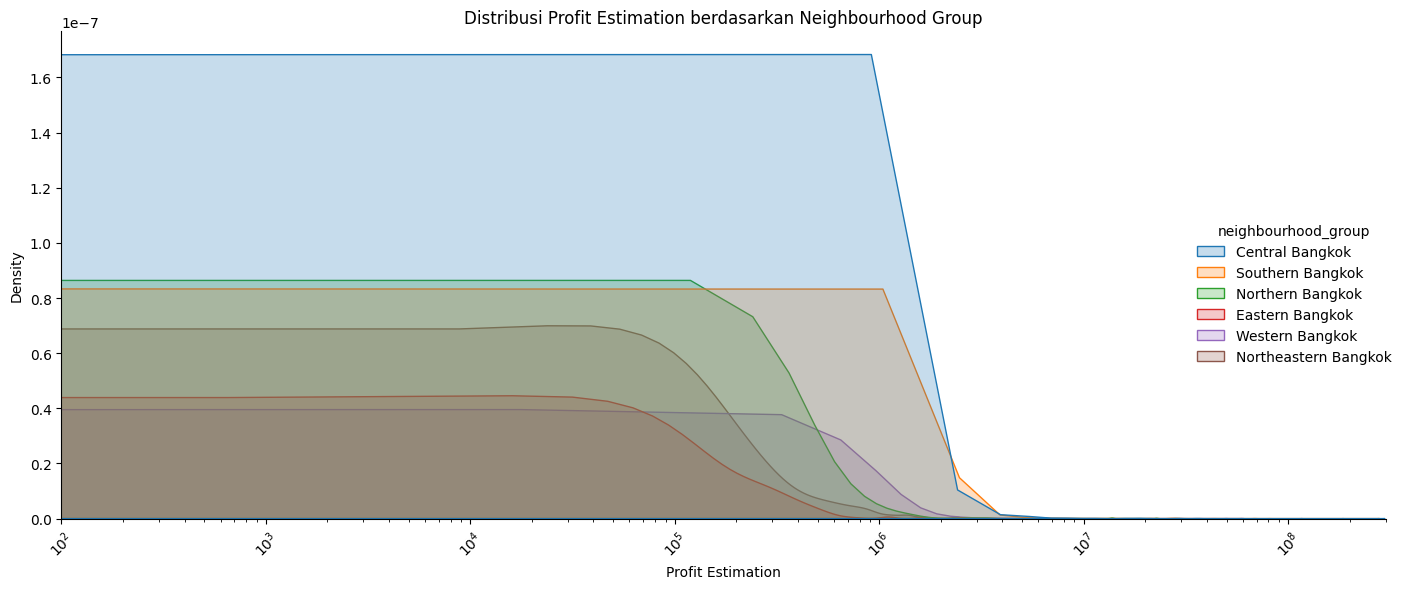

In [187]:
# Membuat distribusi dengan KDE berdasarkan Profit Estimation
sns.displot(
    data=airbnb_bangkok,
    x='Profit_Estimation',
    hue='neighbourhood_group',
    kind='kde',  # atau gunakan 'hist' jika histogram lebih dibutuhkan
    fill=True,
    height=6,
    aspect=2,
    common_norm=True  # Normalisasi sehingga total area di bawah kurva adalah 1 (100%)
)

# Menambahkan judul dan label
plt.title('Distribusi Profit Estimation berdasarkan Neighbourhood Group')
plt.xlabel('Profit Estimation')

# Menambahkan label pada sumbu Y yang menunjukkan persentase
plt.ylabel('Density')

# Menentukan format angka di axis X sebagai nominal (tanpa notasi ilmiah)
plt.ticklabel_format(style='plain', axis='x')  # Menggunakan format nominal, tanpa notasi ilmiah

# Memutar label pada sumbu X agar tidak saling bertabrakan
plt.xticks(rotation=45)

# Menggunakan log scale pada sumbu X untuk memperbaiki pembacaan distribusi yang terpusat
plt.xscale('log')

# Menambahkan batasan pada sumbu X agar lebih sesuai dengan data
plt.xlim(left=1e2, right=3e8)

# Memperbaiki tata letak
plt.tight_layout()
plt.show()

Neighbourhood
- Properti di Bang Bon menunjukkan outlier yang jelas menandakan ada properti yang memiliki availability rendah
- Tingkat availability masih banyak cenderung tinggi
- Vadhana, Huai khwan, dan Khlong Toei memiliki variabilitas harga yang sangat luas menandakan ketidak konsistenan harga di satu wilayah
- Namun dari sisi estimasi profit Vadhana, Huai khwan, dan Khlong Toei memiliki profit yang tinggi

Sampanthawong memiliki potensi yang bagus melihat properti nya yang lebih sering diorder, harga bersaing, dan profit estimasi yang cukup tinggi

di lain sisi untuk memaksimalkan lagi profit di wilayah elit seperti Vadhana, Huai khwan, dan Khlong Toei perlu nya monitoring ketat untuk meningkatkan tingkat okupansi dan menurunkan standarisasi harga (jika memungkinkan)

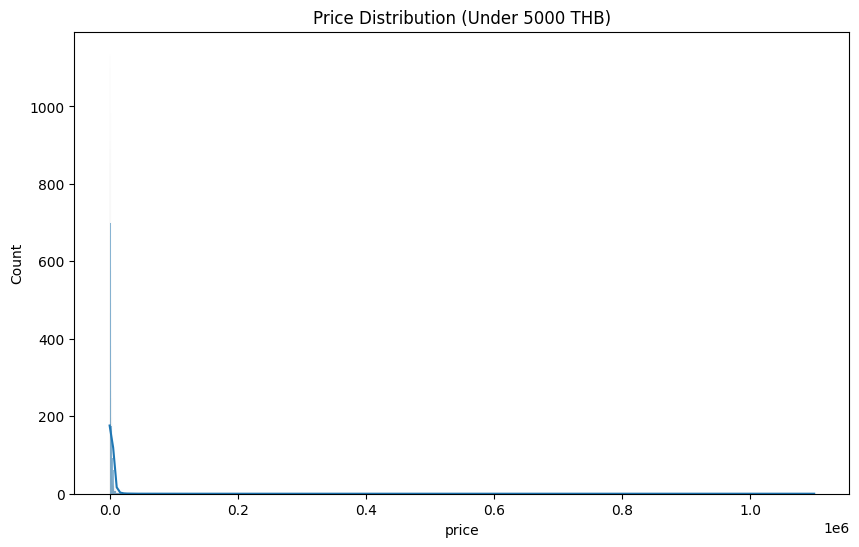

In [188]:
# Properti

plt.figure(figsize=(10,6))
sns.histplot(airbnb_bangkok['price'], kde=True)
plt.title('Price Distribution (Under 5000 THB)')
plt.show()

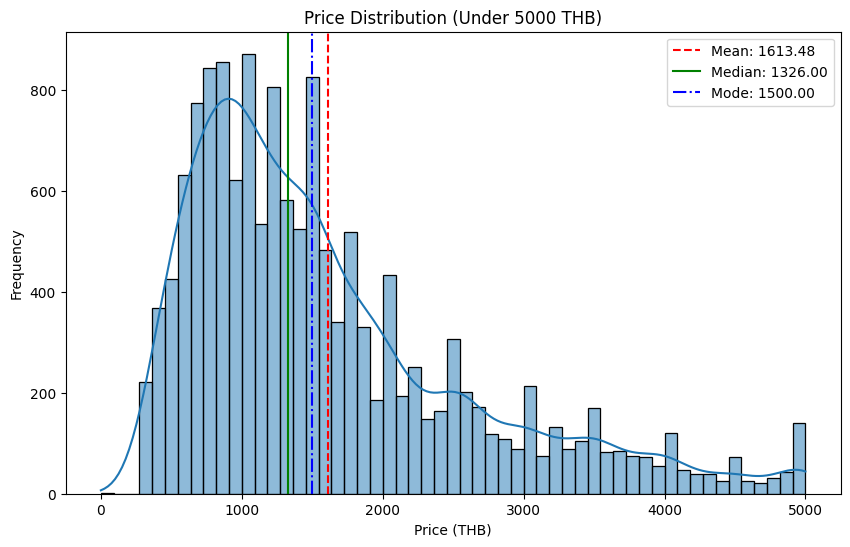

In [189]:
under_5000 = airbnb_bangkok[airbnb_bangkok['price'] <= 5000]

# Hitung mean, median, mode
mean_price_5000 = under_5000['price'].mean()
median_price_5000 = under_5000['price'].median()
mode_price_5000 = under_5000['price'].mode()[0]

# Tampilkan histogram dengan garis mean, median, mode
plt.figure(figsize=(10,6))
sns.histplot(under_5000['price'], kde=True)
plt.title('Price Distribution (Under 5000 THB)')
plt.xlabel('Price (THB)')
plt.ylabel('Frequency')

# Menambahkan garis untuk mean, median, mode
plt.axvline(mean_price_5000, color='r', linestyle='--', label=f'Mean: {mean_price_5000:.2f}')
plt.axvline(median_price_5000, color='g', linestyle='-', label=f'Median: {median_price_5000:.2f}')
plt.axvline(mode_price_5000, color='b', linestyle='-.', label=f'Mode: {mode_price_5000:.2f}')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

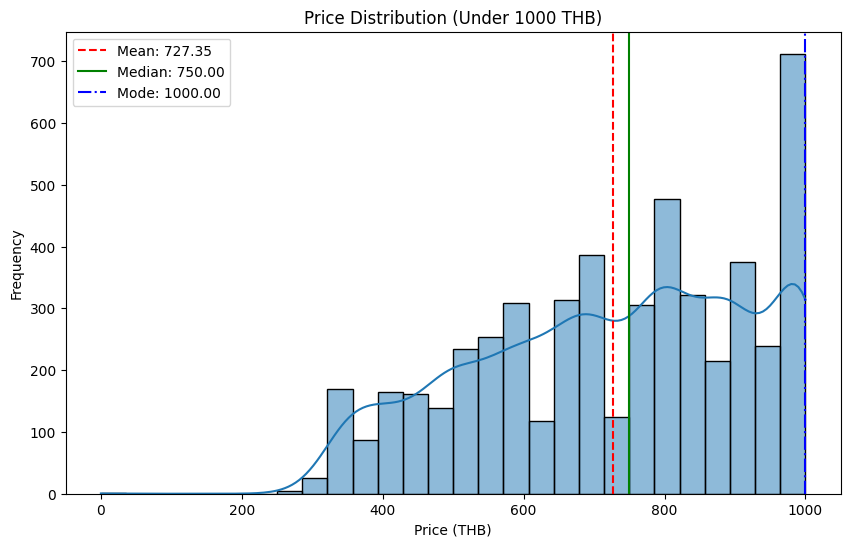

In [190]:
under_1000 = airbnb_bangkok[airbnb_bangkok['price'] <= 1000]

# Hitung mean, median, mode
mean_price_1000 = under_1000['price'].mean()
median_price_1000 = under_1000['price'].median()
mode_price_1000 = under_1000['price'].mode()[0]

# Tampilkan histogram dengan garis mean, median, mode
plt.figure(figsize=(10,6))
sns.histplot(under_1000['price'], kde=True)
plt.title('Price Distribution (Under 1000 THB)')
plt.xlabel('Price (THB)')
plt.ylabel('Frequency')

# Menambahkan garis untuk mean, median, mode
plt.axvline(mean_price_1000, color='r', linestyle='--', label=f'Mean: {mean_price_1000:.2f}')
plt.axvline(median_price_1000, color='g', linestyle='-', label=f'Median: {median_price_1000:.2f}')
plt.axvline(mode_price_1000, color='b', linestyle='-.', label=f'Mode: {mode_price_1000:.2f}')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

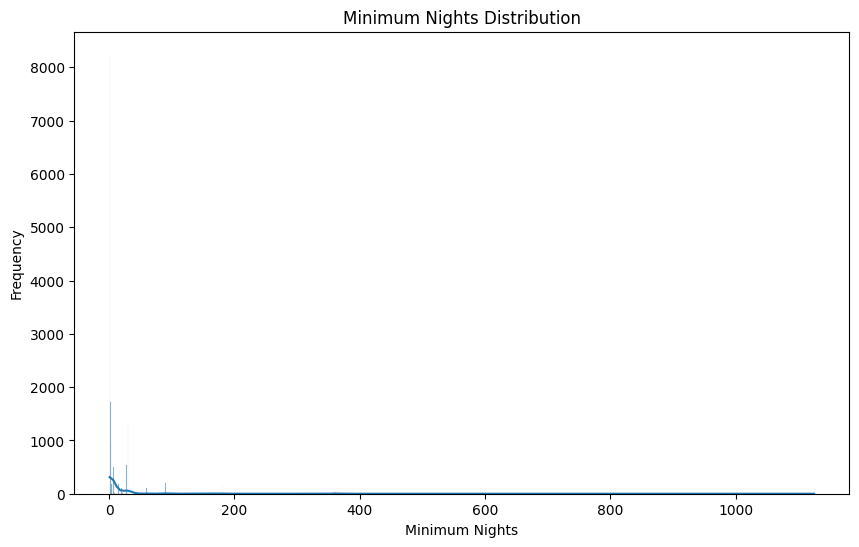

In [191]:
# Tampilkan histogram dengan garis mean, median, mode
plt.figure(figsize=(10,6))
sns.histplot(airbnb_bangkok['minimum_nights'], kde=True)
plt.title('Minimum Nights Distribution')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

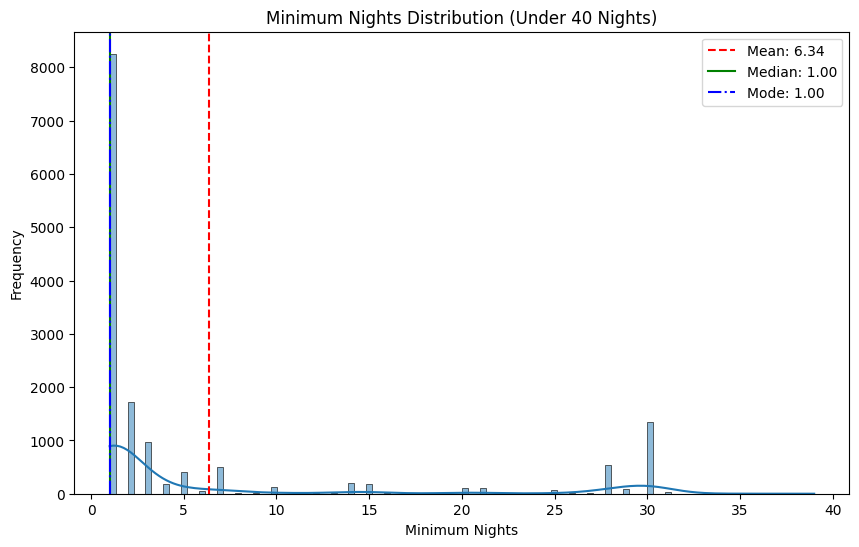

In [192]:
under_40_nights = airbnb_bangkok[airbnb_bangkok['minimum_nights'] < 40]

# Hitung mean, median, mode untuk minimum_nights < 40
mean_min_nights_40 = under_40_nights['minimum_nights'].mean()
median_min_nights_40 = under_40_nights['minimum_nights'].median()
mode_min_nights_40 = under_40_nights['minimum_nights'].mode()[0]

# Tampilkan histogram dengan garis mean, median, mode
plt.figure(figsize=(10,6))
sns.histplot(under_40_nights['minimum_nights'], kde=True)
plt.title('Minimum Nights Distribution (Under 40 Nights)')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

# Menambahkan garis untuk mean, median, mode
plt.axvline(mean_min_nights_40, color='r', linestyle='--', label=f'Mean: {mean_min_nights_40:.2f}')
plt.axvline(median_min_nights_40, color='g', linestyle='-', label=f'Median: {median_min_nights_40:.2f}')
plt.axvline(mode_min_nights_40, color='b', linestyle='-.', label=f'Mode: {mode_min_nights_40:.2f}')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

Properti:
- Pada range harga 0 - 5.000 Baht rata-rata properti di 1.613 Baht dengan pembelian terbanyak di harga 1.500 Baht
- Pada range harga 0-1.000 Baht rata-rata properti di 727 Baht dengan pembelian terbanyak di harga 1.000 Baht
- untuk range minimum nights 0-40 malam, rata-rata penginapan di 6 malam, dengan properti terbanyak di minimum 1 malam

Dengan demikian range harga yang bisa difokuskan berkisar di 700 s.d. 1.000
Baht untuk customer budget friendly dan

untuk harga 1.000 s.d. 1600 Baht di customer premium budget

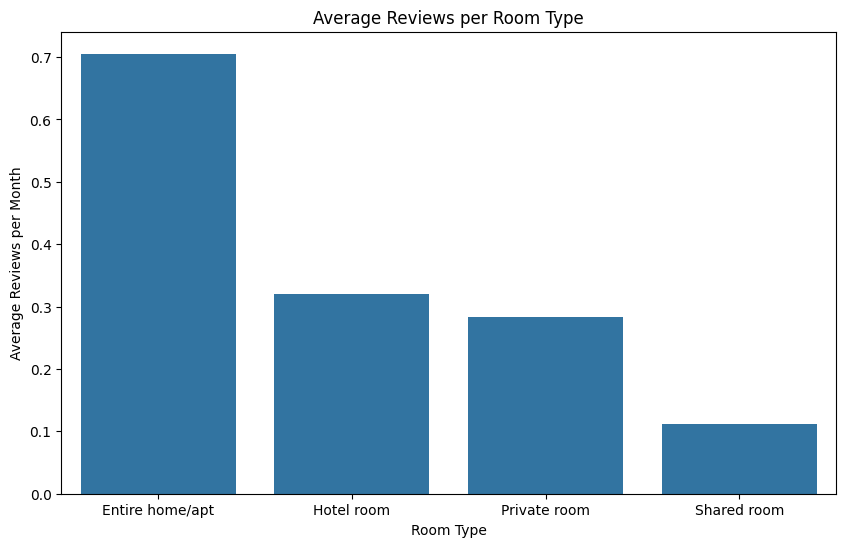

In [193]:
# User Review
avg_reviews_per_room_type = airbnb_bangkok.groupby('room_type')['reviews_per_month'].mean()

# Mengurutkan data dari yang tertinggi ke terendah
avg_reviews_per_room_type_sorted = avg_reviews_per_room_type.sort_values(ascending=False)

# Membuat bar plot yang terurut berdasarkan rata-rata reviews per bulan
plt.figure(figsize=(10,6))
sns.barplot(x=avg_reviews_per_room_type_sorted.index, y=avg_reviews_per_room_type_sorted.values)

# Menambahkan judul dan label
plt.title('Average Reviews per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Reviews per Month')

# Menampilkan plot
plt.show()

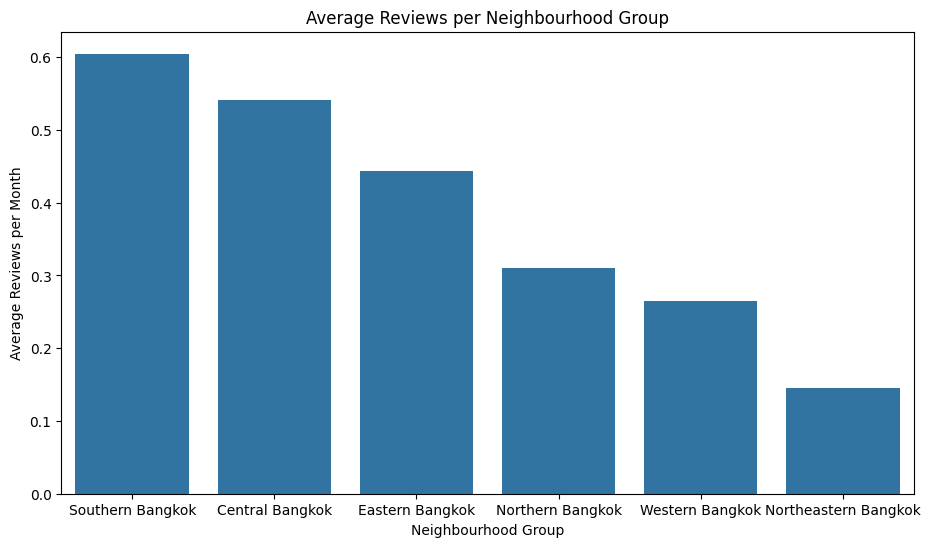

In [194]:
avg_reviews_per_group = airbnb_bangkok.groupby('neighbourhood_group')['reviews_per_month'].mean()

# Mengurutkan data dari yang tertinggi ke terendah
avg_reviews_per_group_sorted = avg_reviews_per_group.sort_values(ascending=False)

# Membuat bar plot yang terurut berdasarkan rata-rata reviews per bulan
plt.figure(figsize=(11,6))
sns.barplot(x=avg_reviews_per_group_sorted.index, y=avg_reviews_per_group_sorted.values)

# Menambahkan judul dan label
plt.title('Average Reviews per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Reviews per Month')

# Menampilkan plot
plt.show()

User Review:
- Reviewer lebih banyak memesan entire home/apt
- daerah Khlong toei paling banyak di review
-  


In [195]:
import folium
import pandas as pd
import geopandas as gpd
from branca.element import Template, MacroElement

# BACA DATA GEOJSON
gdf = gpd.read_file('/content/drive/MyDrive/Purwadhika/Bangkok-subdistricts.geojson')

# MAPPING dari Thai DNAME ke Region Airbnb
dname_to_region = {
    'เขตพระนคร': 'Central Bangkok', 'เขตป้อมปราบศัตรูพ่าย': 'Central Bangkok',
    'เขตดุสิต': 'Central Bangkok', 'เขตพญาไท': 'Central Bangkok',
    'เขตราชเทวี': 'Central Bangkok', 'เขตปทุมวัน': 'Central Bangkok',
    'เขตสาทร': 'Central Bangkok', 'เขตบางรัก': 'Central Bangkok',
    'เขตวัฒนา': 'Central Bangkok', 'เขตคลองเตย': 'Central Bangkok',
    'เขตดินแดง': 'Central Bangkok', 'เขตห้วยขวาง': 'Central Bangkok',
    'เขตวังทองหลาง': 'Central Bangkok',

    'เขตจตุจักร': 'Northern Bangkok', 'เขตบางซื่อ': 'Northern Bangkok',
    'เขตลาดพร้าว': 'Northern Bangkok', 'เขตบางเขน': 'Northern Bangkok',
    'เขตหลักสี่': 'Northern Bangkok', 'เขตสายไหม': 'Northern Bangkok',
    'เขตดอนเมือง': 'Northern Bangkok',

    'เขตบึงกุ่ม': 'Northeastern Bangkok', 'เขตคันนายาว': 'Northeastern Bangkok',
    'เขตสะพานสูง': 'Northeastern Bangkok', 'เขตมีนบุรี': 'Northeastern Bangkok',
    'เขตคลองสามวา': 'Northeastern Bangkok', 'เขตหนองจอก': 'Northeastern Bangkok',

    'เขตบางกะปิ': 'Eastern Bangkok', 'เขตลาดกระบัง': 'Eastern Bangkok',
    'เขตประเวศ': 'Eastern Bangkok', 'เขตสวนหลวง': 'Eastern Bangkok',
    'เขตพระโขนง': 'Eastern Bangkok', 'เขตบางนา': 'Eastern Bangkok',

    'เขตบางบอน': 'Western Bangkok', 'เขตบางแค': 'Western Bangkok',
    'เขตบางขุนเทียน': 'Western Bangkok', 'เขตบางพลัด': 'Western Bangkok',
    'เขตภาษีเจริญ': 'Western Bangkok', 'เขตหนองแขม': 'Western Bangkok',
    'เขตจอมทอง': 'Western Bangkok', 'เขตตลิ่งชัน': 'Western Bangkok',
    'เขตทวีวัฒนา': 'Western Bangkok', 'เขตธนบุรี': 'Western Bangkok',
    'เขตราษฎร์บูรณะ': 'Western Bangkok', 'เขตคลองสาน': 'Western Bangkok',
    'เขตยานนาวา': 'Western Bangkok',

    'เขตบางกอกใหญ่': 'Southern Bangkok', 'เขตบางกอกน้อย': 'Southern Bangkok',
    'เขตทุ่งครุ': 'Southern Bangkok',
}

# Tambahkan kolom 'neighbourhood_group' (region) ke GeoDataFrame
gdf['neighbourhood_group'] = gdf['DNAME'].map(dname_to_region)

# AGREGASI dari Data Airbnb
property_count = airbnb_bangkok.groupby('neighbourhood_group').agg({
    'id': 'count'
}).reset_index().rename(columns={'neighbourhood_group': 'region', 'id': 'property_count'})

# Gabungkan GeoDataFrame dengan agregasi berdasarkan region
merged = gdf.merge(property_count, left_on='neighbourhood_group', right_on='region')

# SIMPAN ke GeoJSON SEMENTARA
merged.to_file('/content/drive/MyDrive/Purwadhika/merged_bangkok.geojson', driver='GeoJSON')

In [196]:
gdf.head()

,PNAME,SUBDIST_ID,DCODE,AREA_,SUB_CODE,PERIMETER,DNAME,OBJECTID,SNAME,SCODE,SCODE_BMA,PCODE,SUBDIST_,water,geometry,neighbourhood_group
0,กรุงเทพมหานคร,64,1005,2.292252e+07,0508,24078.875000,เขตบางเขน,52.0,แขวงท่าแร้ง,100508,100502,10,65,3007,"POLYGON ((100.65316 13.88633, 100.65321 13.886...",Northern Bangkok
1,กรุงเทพมหานคร,66,1046,1.734930e+07,4605,19713.927734,เขตคลองสามวา,55.0,แขวงทรายกองดินใต้,104605,104605,10,68,6214,"POLYGON ((100.78765 13.87913, 100.78769 13.879...",Northeastern Bangkok
2,กรุงเทพมหานคร,69,1046,1.064662e+07,4604,15812.434570,เขตคลองสามวา,57.0,แขวงทรายกองดิน,104604,104604,10,70,3462,"POLYGON ((100.76269 13.86874, 100.76276 13.868...",Northeastern Bangkok
3,กรุงเทพมหานคร,143,1037,2.474956e+06,3704,7526.941895,เขตราชเทวี,1.0,แขวงมักกะสัน,103704,103704,10,155,190,"POLYGON ((100.54337 13.76279, 100.54346 13.762...",Central Bangkok
4,กรุงเทพมหานคร,145,1001,1.879455e+05,0108,1979.035767,เขตพระนคร,2.0,แขวงตลาดยอด,100108,100108,10,156,1,"POLYGON ((100.50015 13.76171, 100.49902 13.759...",Central Bangkok


In [197]:
import folium
import geopandas as gpd
import pandas as pd
from folium.plugins import MarkerCluster

# Load GeoDataFrame (Gantilah dengan lokasi file GeoJSON yang sesuai)
merged = gpd.read_file('/content/drive/MyDrive/Purwadhika/merged_bangkok.geojson')

# Pastikan kolom latitude dan longitude sudah ada di merged
# Menghitung jumlah properti per neighbourhood group
property_count_per_group = airbnb_bangkok.groupby('neighbourhood_group')['id'].count().reset_index()
property_count_per_group = property_count_per_group.rename(columns={'id': 'property_count'})

# Menghitung density properti berdasarkan jumlah id per neighbourhood group
merged['density'] = merged['property_count'] / merged['geometry'].area  # Menggunakan luas area sebagai pembagi

# Membuat peta interaktif
choropleth_map = folium.Map(location=[13.7563, 100.5018], zoom_start=11)

# Menambahkan Choropleth Layer berdasarkan 'density' per neighbourhood group
folium.Choropleth(
    geo_data=merged,
    name='Choropleth Density',
    data=merged,
    columns=['neighbourhood_group', 'density'],
    key_on='feature.properties.neighbourhood_group',  # Menyocokkan dengan key pada geojson
    fill_color='YlOrRd',  # Skema warna untuk choropleth
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Property Density by Neighbourhood Group',
    highlight=True
).add_to(choropleth_map)

# 1. Buat MarkerCluster untuk mengelompokkan marker
marker_cluster = MarkerCluster().add_to(choropleth_map)

# 2. Menentukan ikon berdasarkan room_type
def get_icon(room_type):
    if room_type == 'Entire home/apt':
        return folium.Icon(color='blue', icon='home', prefix='fa')  # Rumah icon
    elif room_type == 'Hotel room':
        return folium.Icon(color='green', icon='hotel', prefix='fa')  # Hotel icon
    elif room_type == 'Private room':
        return folium.Icon(color='orange', icon='bed', prefix='fa')  # Bed icon
    elif room_type == 'Shared room':
        return folium.Icon(color='red', icon='users', prefix='fa')  # Users icon
    else:
        return folium.Icon(color='gray', icon='question', prefix='fa')  # Default icon

# 3. Menambahkan marker untuk setiap baris dalam DataFrame
for idx, row in airbnb_bangkok.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],  # Menggunakan row['latitude'] dan row['longitude'] untuk mendapatkan nilai dari setiap baris
        popup=f"Room Type: {row['room_type']}",
        icon=get_icon(row['room_type'])  # Menambahkan ikon sesuai room_type
    ).add_to(marker_cluster)  # Menambahkan marker ke MarkerCluster

# 4. Menambahkan Custom Legend HTML untuk choropleth map
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 150px; background-color: white; border:2px solid grey; z-index:9999; font-size:14px; padding: 10px; box-shadow: 2px 2px 6px rgba(0,0,0,0.3);">
<b>Legenda Density</b><br>
<i style="background: #ffffb2; width: 18px; height: 18px; float: left; margin-right: 8px;"></i> Low<br>
<i style="background: #fecc5c; width: 18px; height: 18px; float: left; margin-right: 8px;"></i> Medium<br>
<i style="background: #fd8d3c; width: 18px; height: 18px; float: left; margin-right: 8px;"></i> High<br>
</div>
"""
legend = MacroElement()
legend._template = Template(legend_html)
choropleth_map.get_root().add_child(legend)

# 5. Menambahkan Layer Control untuk kontrol peta
folium.LayerControl().add_to(choropleth_map)

# 6. Menampilkan peta
choropleth_map


Output hidden; open in https://colab.research.google.com to view.

# Statistik

In [198]:
# Chi-Square antara harga dan availability_365

price_bins = pd.cut(airbnb_bangkok['price'], bins=[0, 1000, 5000, 10000, 20000, 50000, np.inf], labels=['0-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000+'])
availability_bins = pd.cut(airbnb_bangkok['availability_365'], bins=[0, 100, 200, 300, 365], labels=['0-100', '100-200', '200-300', '300-365'])

contingency = pd.crosstab(price_bins, availability_bins)
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square result between price and availability_365: {chi2}, p-value: {p}")

Chi-square result between price and availability_365: 100.88503737453819, p-value: 8.864643824836443e-15


In [199]:
# Chi-Square antara mean harga dan mean availability_365
mean_price_by_neighbourhood = airbnb_bangkok.groupby('neighbourhood')['price'].mean().reset_index()
mean_availability_by_neighbourhood = airbnb_bangkok.groupby('neighbourhood')['availability_365'].mean().reset_index()

# 2. Lakukan binning pada rata-rata harga
price_bins_mean = pd.cut(mean_price_by_neighbourhood['price'],
                    bins=[0, 1000, 2000, 3000, 4000, 5000, np.inf],
                    labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000','5000+'])

# 3. Kelompokkan data berdasarkan availability_365 dan lakukan binning
availability_bins_mean = pd.cut(mean_availability_by_neighbourhood['availability_365'],
                           bins=[0, 25, 50, 75, 100, 150, 200, 250, 300, 365],
                           labels=['0-25', '25-50', '50-75', '75-100', '100-150', '150-200', '200-250', '250-300', '300-365'])

# 4. Buat tabel kontingensi antara rata-rata harga (dari binning) dan availability_365 (dari binning)
contingency = pd.crosstab(price_bins_mean, availability_bins_mean)

# 5. Jalankan Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)

# 6. Menampilkan hasil
print(f"Chi-square result between mean price and availability_365: {chi2}, p-value: {p}")

Chi-square result between mean price and availability_365: 14.166666666666666, p-value: 0.07752341580785503


In [200]:
# Chi-Square antara variabilitas harga dan availability_365

price_variability = airbnb_bangkok.groupby('neighbourhood')['price'].std()
price_variability = price_variability.reset_index()

# Menggabungkan data price_variability dengan airbnb_bangkok untuk membuat tabel kontingensi
merged_data = pd.merge(airbnb_bangkok, price_variability, on='neighbourhood', suffixes=('', '_variability'))
variability_bins = pd.cut(merged_data['price_variability'], bins=[0, 5000, 10000, 15000, 20000, np.inf], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000+'])

contingency2 = pd.crosstab(variability_bins, merged_data['availability_365'])
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contingency2)
print(f"Chi-square result for price variability and availability_365: {chi2_2}, p-value: {p_2}")

Chi-square result for price variability and availability_365: 2867.9306206436354, p-value: 3.1841581925147196e-94


In [201]:
# Chi-Square antara minimum night dan mean availability_365

# 1. Menghitung rata-rata availability_365 per neighbourhood
mean_availability_by_neighbourhood = airbnb_bangkok.groupby('neighbourhood')['availability_365'].mean().reset_index()

# 2. Lakukan binning pada minimum_nights
min_nights_bins = pd.cut(airbnb_bangkok['minimum_nights'],
                         bins=[0, 1, 5, 10, 20, 50, np.inf],
                         labels=['0-1', '1-5', '5-10', '10-20', '20-50', '50+'])

# 3. Lakukan binning pada rata-rata availability_365
availability_bins_mean = pd.cut(mean_availability_by_neighbourhood['availability_365'],
                                bins=[0, 25, 50, 75, 100, 150, 200, 250, 300, 365],
                                labels=['0-25', '25-50', '50-75', '75-100', '100-150', '150-200', '200-250', '250-300', '300-365'])

# 4. Buat tabel kontingensi antara minimum_nights dan mean availability_365
contingency = pd.crosstab(min_nights_bins, availability_bins_mean)

# 5. Jalankan Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)

# 6. Menampilkan hasil
print(f"Chi-square result between minimum nights and mean availability_365: {chi2}, p-value: {p}")

Chi-square result between minimum nights and mean availability_365: 7.404761904761904, p-value: 0.6867596398842353


In [202]:
# 1. Menghitung jumlah properti per neighbourhood
property_count_by_neighbourhood = airbnb_bangkok.groupby('host_id')['id'].count().reset_index()

# 2. Binning jumlah properti per neighbourhood
property_bins = pd.cut(property_count_by_neighbourhood['id'],
                       bins=[0, 50, 100, 150, 200, np.inf],
                       labels=['0-50', '50-100', '100-150', '150-200', '200+'])

# 3. Binning untuk availability_365
availability_bins = pd.cut(airbnb_bangkok['availability_365'],
                           bins=[0, 100, 200, 300, 365],
                           labels=['0-100', '100-200', '200-300', '300-365'])

# 4. Membuat tabel kontingensi antara jumlah properti per neighbourhood dan availability_365
contingency = pd.crosstab(property_bins, availability_bins)

# 5. Jalankan Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)

# 6. Menampilkan hasil
print(f"Chi-square result between property count and availability_365: {chi2}, p-value: {p}")

Chi-square result between property count and availability_365: 6.193673187975746, p-value: 0.401848286888548


Hasil Chi Square:
- Chi-square result between price and availability_365: 100.88503737453819, p-value: 8.864643824836443e-15
- Chi-square result for price variability and availability_365: 2867.9306206436354, p-value: 3.1841581925147196e-94
- Chi-square result between minimum nights and mean availability_365: 7.404761904761904, p-value: 0.6867596398842353

Chi-square result between minimum nights and mean availability_365: 7.404761904761904, p-value: 0.6867596398842353
Korelasi Pearson dengan Availability_365:
availability_365                  1.000000
id                                0.123171
minimum_nights                    0.053190
host_id                           0.033208
latitude                          0.008853
calculated_host_listings_count    0.008568
price                             0.000793
longitude                        -0.018050
Days_Occupancy                   -0.038837
reviews_per_month                -0.074149
number_of_reviews                -0.077208
number_of_reviews_ltm            -0.077680
Profit_Estimation                -0.086781
Name: availability_365, dtype: float64


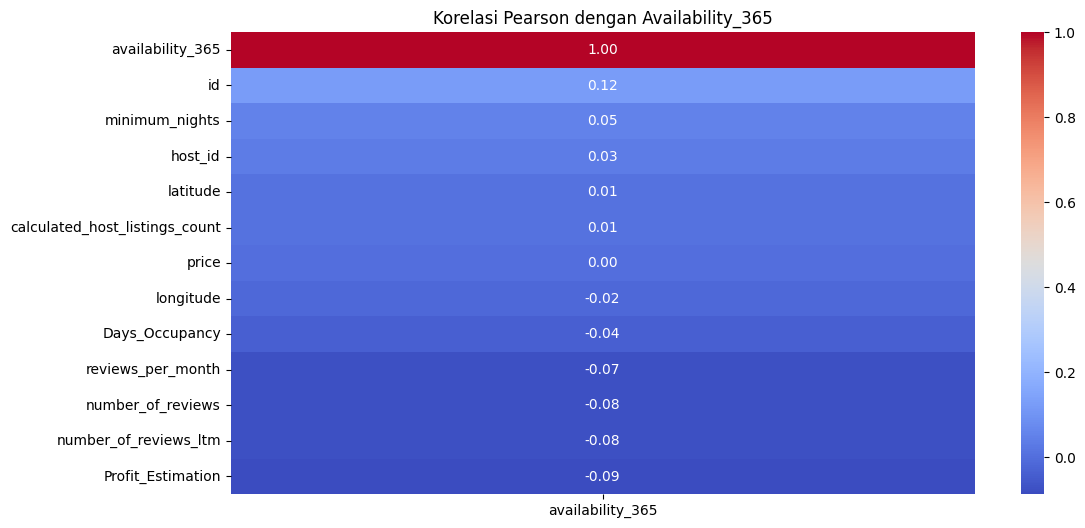

In [203]:
# 1. Menghitung rata-rata availability_365 per neighbourhood
mean_availability_by_neighbourhood = airbnb_bangkok.groupby('neighbourhood')['availability_365'].mean().reset_index()

# 2. Lakukan binning pada minimum_nights
min_nights_bins = pd.cut(airbnb_bangkok['minimum_nights'],
                         bins=[0, 1, 5, 10, 20, 50, np.inf],
                         labels=['0-1', '1-5', '5-10', '10-20', '20-50', '50+'])

# 3. Lakukan binning pada rata-rata availability_365
availability_bins_mean = pd.cut(mean_availability_by_neighbourhood['availability_365'],
                                bins=[0, 25, 50, 75, 100, 150, 200, 250, 300, 365],
                                labels=['0-25', '25-50', '50-75', '75-100', '100-150', '150-200', '200-250', '250-300', '300-365'])

# 4. Buat tabel kontingensi antara minimum_nights dan mean availability_365
contingency = pd.crosstab(min_nights_bins, availability_bins_mean)

# 5. Jalankan Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)

# 6. Menampilkan hasil
print(f"Chi-square result between minimum nights and mean availability_365: {chi2}, p-value: {p}")# Pilih hanya kolom numerik untuk menghitung korelasi
numeric_columns = airbnb_bangkok.select_dtypes(include=[np.number])

# Hitung korelasi Pearson antara setiap variabel dan availability_365
correlation_with_availability = numeric_columns.corr()['availability_365'].sort_values(ascending=False)

# Menampilkan hasil korelasi dengan availability_365
print("Korelasi Pearson dengan Availability_365:")
print(correlation_with_availability)

# Menampilkan grafik korelasi dalam bentuk heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_with_availability.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Pearson dengan Availability_365")
plt.show()

# Menampilkan statistik deskriptif untuk variabel numerik
descriptive_stats = numeric_columns.describe()

Penjelasan korelasi:
- Korelasi Price: 0.000793 (Positif lemah).

Karena harga tidak memiliki korelasi yang signifikan terhadap availability, bisnis bisa lebih fokus pada strategi harga yang fleksibel berdasarkan demand.
Namun, berdasarkan Chi-Square dan analisis kategori harga, kita bisa melihat bahwa harga dapat mempengaruhi ketersediaan dalam kategori tertentu.

- Korelasi Profit Estimation: -0.086781 (Negatif lemah).

Dengan meningkatnya profit dapat menurunkan availability, strategi dynamic pricing yang menyesuaikan harga dengan permintaan akan sangat penting.

- Korelasi Reviews: -0.074149 (reviews_per_month), -0.077208 (number_of_reviews), -0.077680 (number_of_reviews_ltm).

Meskipun jumlah ulasan tidak langsung memengaruhi availability, namun semakin banyak ulasan arah positif bisa cenderung menurunkan availability

- Latitude & Longitude: korelasi lemah dengan availability

Lokasi properti hampir tidak mempengaruhi ketersediaan. yang berarti ada faktor lain seperti spesifikasi properti dan harga yang lebih mempengaruhi

- Korelasi Minimum Nights: 0.053190 (Positif lemah).
Pemilik dapat mencoba eksperimen minimum night untuk mengoptimalisasi penurunan availibility, namun minimum night yang terlalu tinggi cenderung mengurangi tingkat pemesanan


Rekomendasi Bisnis:
Strategi Harga: Menyesuaikan harga berdasarkan harga dinamis dan permintaan musiman dapat membantu dalam meningkatkan ketersediaan dan pemanfaatan properti secara optimal.

Atur Minimum Nights: Mengurangi batas minimum nights dapat meningkatkan ketersediaan properti karena lebih banyak tamu yang dapat memesan untuk periode yang lebih singkat.

Pengelolaan Ulasan: Fokus pada meningkatkan jumlah ulasan untuk meningkatkan popularitas dan menarik lebih banyak tamu, meskipun akan mengurangi ketersediaan.

Optimalisasi Pengisian Properti: Dengan meningkatkan tingkat hunian Days Occupancy, pemilik dapat meningkatkan ketersediaan secara keseluruhan.

In [204]:
# f. Count of reviews
reviews_count = airbnb_bangkok['number_of_reviews'].sum()

# g. Count of reviews in the last 12 months (LTM)
reviews_ltm_count = airbnb_bangkok['number_of_reviews_ltm'].sum()

print(f'''Jumlah all reviewer: {reviews_count:,.0f}
Jumlah reviewer 12 bulan terakhir: {reviews_ltm_count:,.0f}'''.replace(',', '.'))

Jumlah all reviewer: 264.034
Jumlah reviewer 12 bulan terakhir: 55.196


In [205]:
# 2. Hitung total okupansi dari seluruh properti
total_okupansi = airbnb_bangkok['Days_Occupancy'].sum()

# 3. Hitung jumlah id (jumlah properti)
total_id = airbnb_bangkok['id'].nunique()

# 4. Hitung total hari yang tersedia (jumlah properti x 365)
total_hari_tersedia = total_id * 365

# 5. Hitung tingkat okupansi total
tingkat_okupansi = (total_okupansi / total_hari_tersedia) * 100

# Tampilkan hasil tingkat okupansi
print(f"Total hari properti yang terokupansi: {total_okupansi:,.0f} hari".replace(',', '.'))
print(f"Total hari properti yang tersedia : {total_hari_tersedia:,.0f} hari".replace(',', '.'))
print(f'''Rumus nya = Total properti yang terokupansi / Total hari properti yang tersedia

Maka Tingkat Okupansi airbnb bangkok tahun 2022 adalah: {tingkat_okupansi:.2f}%''')

Total hari properti yang terokupansi: 276.494 hari
Total hari properti yang tersedia : 5.786.345 hari
Rumus nya = Total properti yang terokupansi / Total hari properti yang tersedia

Maka Tingkat Okupansi airbnb bangkok tahun 2022 adalah: 4.78%


In [206]:
# Pilih hanya kolom numerik untuk menghitung korelasi
numeric_columns = airbnb_bangkok.select_dtypes(include=[np.number])

# Hitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = numeric_columns.corr()

# Menampilkan matriks korelasi
correlation_matrix

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Days_Occupancy,Profit_Estimation
id,1.000000,0.342114,-0.019092,-0.005275,0.000246,-0.051647,-0.179266,0.214446,0.081057,0.123171,-0.024479,-0.014529,-0.009187
host_id,0.342114,1.000000,0.052308,0.002095,-0.008940,-0.052762,-0.218291,-0.028081,0.020599,0.033208,-0.051478,-0.038251,-0.001608
latitude,-0.019092,0.052308,1.000000,0.066264,-0.008005,-0.032972,-0.020971,-0.049868,-0.044059,0.008853,-0.043800,-0.027636,-0.011904
longitude,-0.005275,0.002095,0.066264,1.000000,-0.004588,0.018316,-0.028367,-0.020382,-0.043784,-0.018050,-0.021050,0.008283,0.003432
price,0.000246,-0.008940,-0.008005,-0.004588,1.000000,0.020154,-0.004369,-0.011565,-0.013301,0.000793,-0.014165,-0.000280,0.768274
minimum_nights,-0.051647,-0.052762,-0.032972,0.018316,0.020154,1.000000,-0.034217,-0.080452,-0.053603,0.053190,-0.079022,0.199740,0.008198
number_of_reviews,-0.179266,-0.218291,-0.020971,-0.028367,-0.004369,-0.034217,1.000000,0.571886,0.036328,-0.077208,0.499413,0.103748,0.007102
reviews_per_month,0.214446,-0.028081,-0.049868,-0.020382,-0.011565,-0.080452,0.571886,1.000000,0.114961,-0.074149,0.642971,0.133122,0.002862
calculated_host_listings_count,0.081057,0.020599,-0.044059,-0.043784,-0.013301,-0.053603,0.036328,0.114961,1.000000,0.008568,0.111916,0.014016,-0.010197
availability_365,0.123171,0.033208,0.008853,-0.018050,0.000793,0.053190,-0.077208,-0.074149,0.008568,1.000000,-0.077680,-0.038837,-0.086781


In [207]:
# Pilih hanya kolom numerik untuk menghitung korelasi
numeric_columns = airbnb_bangkok.select_dtypes(include=[np.number])

# Hitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = numeric_columns.corr()

# Filter untuk hanya menampilkan nilai korelasi yang lebih besar dari atau sama dengan 0.005
filtered_correlation_matrix = correlation_matrix[correlation_matrix >= 0.005]

# Hapus kolom dan baris yang semuanya NaN
filtered_correlation_matrix = filtered_correlation_matrix.dropna(how='all').dropna(axis=1, how='all')

# Tampilkan hasil korelasi yang lebih besar dari atau sama dengan 0.005 dalam bentuk tabel
filtered_correlation_matrix

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Days_Occupancy,Profit_Estimation
id,1.000000,0.342114,NaN,NaN,NaN,NaN,NaN,0.214446,0.081057,0.123171,NaN,NaN,NaN
host_id,0.342114,1.000000,0.052308,NaN,NaN,NaN,NaN,NaN,0.020599,0.033208,NaN,NaN,NaN
latitude,NaN,0.052308,1.000000,0.066264,NaN,NaN,NaN,NaN,NaN,0.008853,NaN,NaN,NaN
longitude,NaN,NaN,0.066264,1.000000,NaN,0.018316,NaN,NaN,NaN,NaN,NaN,0.008283,NaN
price,NaN,NaN,NaN,NaN,1.000000,0.020154,NaN,NaN,NaN,NaN,NaN,NaN,0.768274
minimum_nights,NaN,NaN,NaN,0.018316,0.020154,1.000000,NaN,NaN,NaN,0.053190,NaN,0.199740,0.008198
number_of_reviews,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.571886,0.036328,NaN,0.499413,0.103748,0.007102
reviews_per_month,0.214446,NaN,NaN,NaN,NaN,NaN,0.571886,1.000000,0.114961,NaN,0.642971,0.133122,NaN
calculated_host_listings_count,0.081057,0.020599,NaN,NaN,NaN,NaN,0.036328,0.114961,1.000000,0.008568,0.111916,0.014016,NaN
availability_365,0.123171,0.033208,0.008853,NaN,NaN,0.053190,NaN,NaN,0.008568,1.000000,NaN,NaN,NaN


Variabel yang punya korelasi signifikan dengan Profit_Estimation:

- price	0.768	Korelasi positif tinggi: semakin tinggi harga, makin tinggi estimasi profit
- minimum_nights	0.008	Hampir tidak ada hubungan
- number_of_reviews & reviews_per_month	0.57	Positif moderat: properti dengan banyak review total cenderung sering direview


Berdasarkan data diatas, di filter lagi dengan korelasi diatas 0.05 yang cukup signifikan

dari sisi bisnis variabel-variabel yang dapat di konsiderasi menjadi dashboard yaitu:


- Properti: availibility + longitude & latitude + reviews_per_month
- Host: calculated_host_listings_count + availability
- Profit_Estimation : price + minimum_nights + availability_365




**Buat kategori variance data**

In [208]:
# KATEGORI MEAN PRICE

# 1. Hitung variansi harga untuk setiap neighbourhood
pricing_stats_neighbourhood = airbnb_bangkok.groupby('neighbourhood_group')['price'].agg(
    mean_price='mean',
    price_variance='var'
).reset_index()

# 2. Klasifikasi variansi harga berdasarkan quantile (3 grup)
pricing_stats_neighbourhood['price_mean_category'] = pd.qcut(
    pricing_stats_neighbourhood['price_variance'],
    q=3,
    labels=['Rendah', 'Sedang', 'Tinggi']
)

# 3. Ambil kolom yang dibutuhkan untuk analisa
result_mean_price = pricing_stats_neighbourhood[['neighbourhood_group', 'mean_price', 'price_variance', 'price_mean_category']].copy()

# 4. Format kolom 'price_variance' ke ribuan tanpa titik/koma
result_mean_price['price_variance'] = result_mean_price['price_variance'].apply(lambda x: f"{int(x):,}".replace(",", ""))

# 5. Reset index agar 'neighbourhood' jadi kolom
result_mean_price = result_mean_price.reset_index(drop=True)

# 6. Tampilkan hasil menggunakan pandas
result_mean_price.head()

,neighbourhood_group,mean_price,price_variance,price_mean_category
0,Central Bangkok,3620.433284,815572927,Tinggi
1,Eastern Bangkok,1483.782222,3052196,Rendah
2,Northeastern Bangkok,2126.409953,15152108,Rendah
3,Northern Bangkok,1959.710398,42307228,Sedang
4,Southern Bangkok,3049.484076,533210765,Tinggi


In [209]:
# VARIABILITAS PRICE

# 1. Hitung variabilitas harga (standar deviasi) untuk setiap neighbourhood
pricing_stats_variability = airbnb_bangkok.groupby('neighbourhood_group')['price'].std().reset_index()

# 2. Klasifikasi variabilitas harga berdasarkan quantile (3 grup)
pricing_stats_variability['price_variability_category'] = pd.qcut(
    pricing_stats_variability['price'],
    q=3,
    labels=['Rendah', 'Sedang', 'Tinggi']
)

# 3. Ambil kolom yang dibutuhkan untuk analisa
result_variability = pricing_stats_variability[['neighbourhood_group', 'price', 'price_variability_category']].copy()

# 4. Format kolom 'price' ke ribuan tanpa titik/koma untuk penampilan yang lebih rapi
result_variability['price'] = result_variability['price'].apply(lambda x: f"{x:,.0f}")

# 5. Reset index agar 'neighbourhood' jadi kolom
result_variability = result_variability.reset_index(drop=True)

# 6. Tampilkan hasil analisa
result_variability.head()

,neighbourhood_group,price,price_variability_category
0,Central Bangkok,"28,558",Tinggi
1,Eastern Bangkok,"1,747",Rendah
2,Northeastern Bangkok,"3,893",Rendah
3,Northern Bangkok,"6,504",Sedang
4,Southern Bangkok,"23,091",Tinggi


In [210]:
# JUMLAH PROPERTI per neighbourhood group

# 1. Hitung jumlah properti untuk setiap neighbourhood group
pricing_stats_property_count = airbnb_bangkok.groupby('neighbourhood_group')['calculated_host_listings_count'].sum().reset_index()

# 2. Klasifikasi jumlah properti berdasarkan quantile (3 grup)
pricing_stats_property_count['property_count_category'] = pd.qcut(
    pricing_stats_property_count['calculated_host_listings_count'],
    q=3,
    labels=['Rendah', 'Sedang', 'Tinggi']
)

# 3. Ambil kolom yang dibutuhkan untuk analisa
result_property_group_count = pricing_stats_property_count[['neighbourhood_group', 'calculated_host_listings_count', 'property_count_category']].copy()

# 4. Format kolom 'calculated_host_listings_count' ke ribuan tanpa titik/koma untuk penampilan yang lebih rapi
result_property_group_count['calculated_host_listings_count'] = result_property_group_count['calculated_host_listings_count'].apply(lambda x: f"{x:,.0f}")

# 5. Reset index agar 'neighbourhood' jadi kolom
result_property_group_count = result_property_group_count.reset_index(drop=True)

# 6. Tampilkan hasil analisa
result_property_group_count.head()

,neighbourhood_group,calculated_host_listings_count,property_count_category
0,Central Bangkok,"129,386",Tinggi
1,Eastern Bangkok,748,Rendah
2,Northeastern Bangkok,"1,381",Rendah
3,Northern Bangkok,"4,074",Sedang
4,Southern Bangkok,"78,575",Tinggi


In [211]:
# AVAILABILITY PROPERTI

# 1. Hitung rata-rata availability_365 untuk setiap neighbourhood
pricing_stats_availability = airbnb_bangkok.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

# 2. Klasifikasi availability_365 berdasarkan quantile (3 grup)
pricing_stats_availability['availability_category'] = pd.qcut(
    pricing_stats_availability['availability_365'],
    q=3,
    labels=['Rendah', 'Sedang', 'Tinggi']
)

# 3. Ambil kolom yang dibutuhkan untuk analisa
result_availability = pricing_stats_availability[['neighbourhood_group', 'availability_365', 'availability_category']].copy()

# 4. Format kolom 'availability_365' ke ribuan tanpa titik/koma untuk penampilan yang lebih rapi
result_availability['availability_365'] = result_availability['availability_365'].apply(lambda x: f"{x:,.0f}")

# 5. Reset index agar 'neighbourhood' jadi kolom
result_availability = result_availability.reset_index(drop=True)

# 6. Tampilkan hasil analisa
result_availability.head()

,neighbourhood_group,availability_365,availability_category
0,Central Bangkok,239,Rendah
1,Eastern Bangkok,275,Tinggi
2,Northeastern Bangkok,248,Sedang
3,Northern Bangkok,259,Tinggi
4,Southern Bangkok,246,Rendah


In [212]:
# 1. Gabungkan hasil kategori-kategori tanpa angka
final_category_result = pd.merge(result_mean_price[['neighbourhood_group', 'price_mean_category']],
                                 result_variability[['neighbourhood_group', 'price_variability_category']],
                                 on='neighbourhood_group', how='left')

final_category_result = pd.merge(final_category_result, result_property_group_count[['neighbourhood_group', 'property_count_category']],
                                 on='neighbourhood_group', how='left')

final_category_result = pd.merge(final_category_result, result_availability[['neighbourhood_group', 'availability_category']],
                                 on='neighbourhood_group', how='left')

# 2. Menampilkan hasil kategori saja
final_category_result = final_category_result.reset_index(drop=True)

# Tampilkan hasil
final_category_result

,neighbourhood_group,price_mean_category,price_variability_category,property_count_category,availability_category
0,Central Bangkok,Tinggi,Tinggi,Tinggi,Rendah
1,Eastern Bangkok,Rendah,Rendah,Rendah,Tinggi
2,Northeastern Bangkok,Rendah,Rendah,Rendah,Sedang
3,Northern Bangkok,Sedang,Sedang,Sedang,Tinggi
4,Southern Bangkok,Tinggi,Tinggi,Tinggi,Rendah
5,Western Bangkok,Sedang,Sedang,Sedang,Sedang


ANALISA BISNIS:

1. Central Bangkok
Analisa Bisnis:

Central Bangkok memiliki tingkat variabilitas harga dan jumlah properti yang tinggi. Hal ini menunjukkan bahwa kawasan ini memiliki banyak pilihan properti dengan rentang harga yang besar, yang mungkin mengarah pada persaingan harga yang ketat.

Namun, ketersediaan yang rendah bisa menunjukkan bahwa properti cenderung terisi lebih cepat, terutama di kawasan pusat bisnis dan wisata.

Strategi Bisnis: Mengingat tingginya permintaan, bisnis bisa memanfaatkan peningkatan harga musiman dan menawarkan diskon atau promosi di luar musim puncak untuk meningkatkan tingkat ketersediaan.

2. Eastern Bangkok
Analisa Bisnis:

Eastern Bangkok menunjukkan harga yang relatif stabil dengan jumlah properti yang sedikit, tetapi dengan ketersediaan yang tinggi. Hal ini bisa menandakan kawasan yang lebih terjangkau atau mungkin kurang diminati oleh wisatawan dibandingkan kawasan lainnya.

Strategi Bisnis: Untuk menarik lebih banyak perhatian, bisnis bisa meningkatkan pemasaran digital dan kerjasama dengan platform wisata lokal, serta menonjolkan nilai lebih seperti fasilitas tambahan yang menarik bagi wisatawan dengan anggaran terbatas.

3. Northeastern Bangkok
Analisa Bisnis:

Di Northeastern Bangkok, properti memiliki harga yang stabil dan ketersediaan yang lebih baik. Dengan jumlah properti yang rendah, ini menunjukkan bahwa permintaan relatif lebih sedikit di kawasan ini.

Strategi Bisnis: Mengingat ketersediaan yang sedang, bisnis dapat mempertimbangkan untuk meningkatkan penawaran dan mempromosikan kawasan ini untuk menarik lebih banyak pengunjung, mungkin dengan memanfaatkan acara atau festival lokal untuk meningkatkan permintaan.

4. Northern Bangkok
Analisa Bisnis:

Northern Bangkok menunjukkan variabilitas harga dan jumlah properti yang sedang, dengan ketersediaan yang lebih tinggi. Kawasan ini mungkin menawarkan lebih banyak opsi harga menengah yang menarik bagi wisatawan dengan anggaran lebih besar atau keluarga.

Strategi Bisnis: Fokus pada penawaran harga menengah dan mempromosikan properti yang berada di tengah antara budget dan premium. Pemasaran dapat difokuskan pada keunggulan aksesibilitas dan kenyamanan untuk keluarga atau wisatawan jangka panjang.

5. Southern Bangkok
Analisa Bisnis:

Southern Bangkok menawarkan jumlah properti yang tinggi dan harga yang lebih bervariasi, serta ketersediaan yang rendah. Ini menunjukkan kawasan yang memiliki tingkat persaingan yang tinggi, di mana banyak properti tersedia namun terisi lebih cepat.

Strategi Bisnis: Mengingat tingginya permintaan, sangat penting untuk menyesuaikan harga dinamis dan menggunakan strategi pemasaran berbasis waktu untuk mengelola ketersediaan dan menarik lebih banyak pemesanan. Menyediakan penawaran eksklusif atau discount pada periode off-peak bisa meningkatkan tingkat hunian.

Kawasan dengan harga bervariasi dan jumlah properti tinggi (Central Bangkok, Southern Bangkok) memerlukan manajemen harga yang lebih dinamis dan peningkatan promosi musiman untuk mengelola ketersediaan dan memaksimalkan pendapatan.

Kawasan dengan harga lebih stabil dan ketersediaan tinggi (Eastern Bangkok, Northern Bangkok) bisa lebih fokus pada peningkatan visibilitas melalui pemasaran dan penawaran menarik untuk menarik wisatawan.

Kawasan dengan permintaan yang lebih rendah (Northeastern Bangkok) harus mempertimbangkan untuk meningkatkan pemasaran dan memanfaatkan event lokal atau keunggulan lainnya untuk menarik lebih banyak pengunjung.

In [213]:
# 1. Gabungkan hasil kategori-kategori tanpa angka
final_category_result = pd.merge(result_mean_price[['neighbourhood_group', 'price_mean_category']],
                                 result_variability[['neighbourhood_group', 'price_variability_category']],
                                 on='neighbourhood_group', how='left')

final_category_result = pd.merge(final_category_result, result_property_group_count[['neighbourhood_group', 'property_count_category']],
                                 on='neighbourhood_group', how='left')

final_category_result = pd.merge(final_category_result, result_availability[['neighbourhood_group', 'availability_category']],
                                 on='neighbourhood_group', how='left')

# 2. Tambahkan kolom 'Strategi Recommendation' berdasarkan kondisi yang diberikan
def determine_strategy(row):
    if row['price_mean_category'] == 'Tinggi' and row['price_variability_category'] == 'Tinggi' and row['property_count_category'] == 'Tinggi' and row['availability_category'] == 'Rendah':
        return 'Dynamic Pricing & Exclusive Offer'
    elif row['price_mean_category'] == 'Rendah' and row['price_variability_category'] == 'Rendah' and row['property_count_category'] == 'Rendah' and (row['availability_category'] == 'Tinggi' or row['availability_category'] == 'Sedang'):
        return 'Brand awareness & campaign Boosting'
    elif row['price_mean_category'] == 'Sedang' and row['price_variability_category'] == 'Sedang' and row['property_count_category'] == 'Sedang' and (row['availability_category'] == 'Tinggi' or row['availability_category'] == 'Sedang'):
        return 'Dynamic Pricing & event-based campaign'
    else:
        return 'On Analysis'

# Menambahkan kolom 'Strategi Recommendation'
final_category_result['Strategy Recommendation'] = final_category_result.apply(determine_strategy, axis=1)

# 3. Reset index dan menampilkan hasil
final_category_result = final_category_result.reset_index(drop=True)

# Tampilkan hasil
final_category_result


,neighbourhood_group,price_mean_category,price_variability_category,property_count_category,availability_category,Strategy Recommendation
0,Central Bangkok,Tinggi,Tinggi,Tinggi,Rendah,Dynamic Pricing & Exclusive Offer
1,Eastern Bangkok,Rendah,Rendah,Rendah,Tinggi,Brand awareness & campaign Boosting
2,Northeastern Bangkok,Rendah,Rendah,Rendah,Sedang,Brand awareness & campaign Boosting
3,Northern Bangkok,Sedang,Sedang,Sedang,Tinggi,Dynamic Pricing & event-based campaign
4,Southern Bangkok,Tinggi,Tinggi,Tinggi,Rendah,Dynamic Pricing & Exclusive Offer
5,Western Bangkok,Sedang,Sedang,Sedang,Sedang,Dynamic Pricing & event-based campaign


# Penawaran Solusi

1. Dynamic Pricing berfokus pada adjustment baik dari sisi availability, reviewer maupun momentum seperti peak season

2. Campaign boosting baik berbentuk brand awareness maupun promo

3. Exclusive Offer yaitu dengan menawarkan diskon atau promosi di luar musim puncak ataupun penawaran ke grup besar seperti korporasi untuk meningkatkan tingkat ketersediaan

4. Brand awareness dengan cara meningkatkan pemasaran digital dan kerjasama dengan platform wisata lokal

5. Event-based campaign dengan memanfaatkan acara atau festival lokal untuk meningkatkan permintaan.

1. Dynamic Pricing

Berikut adalah contoh penggunaanya

In [214]:
from datetime import datetime

# Sample DataFrame with 'price', 'availability_365', 'reviews_per_month' columns
airbnb_bangkok_example = pd.DataFrame({
    'price': [1500, 3000, 4500, 3500, 6000],  # Original prices
    'availability_365': [100, 250, 300, 150, 50],  # Availability in days
    'reviews_per_month': [10, 5, 15, 20, 3],  # Reviews per month
    'date': ['2024-12-01', '2024-06-01', '2024-04-01', '2024-08-01', '2024-11-01']  # Example booking dates
})

# Convert 'date' column to datetime format
airbnb_bangkok_example['date'] = pd.to_datetime(airbnb_bangkok_example['date'])

# Function to determine seasonal pricing factor
def seasonal_pricing(date):
    # Define peak seasons (e.g., holiday season, school vacation, etc.)
    # Example: High price during December, and lower prices in off-season months
    if date.month == 12:  # December (Holiday Season)
        return 1.5, "Peak Seasons"
    elif date.month in [6, 7, 8]:  # July-August (Peak summer)
        return 1.3, "Peak Seasons"
    else:  # Off-season months
        return 0.8, "Normal"

# Apply seasonal pricing factor based on 'date'
airbnb_bangkok_example[['seasonal_factor', 'season_type']] = airbnb_bangkok_example['date'].apply(lambda x: pd.Series(seasonal_pricing(x)))

# Apply availability factor (adjust based on availability)
availability_factor = airbnb_bangkok_example['availability_365'].apply(lambda x: 1.1 if x < 100 else 0.9)

# Apply review factor (adjust based on reviews)
review_factor = airbnb_bangkok_example['reviews_per_month'].apply(lambda x: 1.2 if x > 10 else 0.8)

# Calculate dynamic price
airbnb_bangkok_example['dynamic_price'] = airbnb_bangkok_example['price'] * airbnb_bangkok_example['seasonal_factor'] * availability_factor * review_factor

# Remove decimal in dynamic price for cleaner presentation
airbnb_bangkok_example['dynamic_price'] = airbnb_bangkok_example['dynamic_price'].round(0).astype(int)

# Renaming columns for clarity
airbnb_bangkok_example = airbnb_bangkok_example.rename(columns={
    'price': 'Original Price',
    'availability_365': 'Availability (days)',
    'reviews_per_month': 'Total Reviewer',
    'dynamic_price': 'Price Recommendation'
})

# Display the result
display(airbnb_bangkok_example[['date','season_type','Original Price', 'Availability (days)', 'Total Reviewer', 'Price Recommendation']])

,date,season_type,Original Price,Availability (days),Total Reviewer,Price Recommendation
0,2024-12-01,Peak Seasons,1500,100,10,1620
1,2024-06-01,Peak Seasons,3000,250,5,2808
2,2024-04-01,Normal,4500,300,15,3888
3,2024-08-01,Peak Seasons,3500,150,20,4914
4,2024-11-01,Normal,6000,50,3,4224


jika digunakan spesifik pada properti saat peak seasson seperti ini

In [262]:
# 1. Salin dataset asli untuk diproses
airbnb_bangkok_processed = airbnb_bangkok.copy()

# 2. Gunakan harga dari kolom 'price' sebagai harga dasar
airbnb_bangkok_processed['Original Price'] = airbnb_bangkok_processed['price']

# 3. Penyesuaian berdasarkan ketersediaan: jika properti sangat tersedia (ketersediaan tinggi), harga lebih rendah
availability_factor = airbnb_bangkok_processed['availability_365'].apply(lambda x: 1.1 if x < 100 else 0.9)

# 4. Penyesuaian berdasarkan jumlah ulasan: jika banyak ulasan, harga dapat lebih tinggi
review_factor = airbnb_bangkok_processed['reviews_per_month'].apply(lambda x: 1.2 if x > 10 else 0.8)

# 5. Menghitung price recommendation dengan harga dinamis
airbnb_bangkok_processed['price_recommendation'] = airbnb_bangkok_processed['Original Price'] * availability_factor * review_factor

# 6. Tentukan pola pembelian: 10% peningkatan, dengan 4 pembelian di peak season
airbnb_bangkok_processed['increased_occupancy'] = (365 - airbnb_bangkok_processed['availability_365']) * 1.1  # Peningkatan 10% occupancy

# Distribusi pembelian di peak season dan normal
peak_season_days = airbnb_bangkok_processed['increased_occupancy'] * 0.4  # 40% pembelian di peak season
normal_season_days = airbnb_bangkok_processed['increased_occupancy'] - peak_season_days  # Sisanya di normal season

# 7. Tentukan harga untuk peak season dan normal season
peak_season_price = airbnb_bangkok_processed['price_recommendation'] * 1.3  # Harga lebih tinggi selama peak season
normal_season_price = airbnb_bangkok_processed['price_recommendation']  # Harga normal

# 8. Hitung profit untuk peak season dan normal season
airbnb_bangkok_processed['peak_season_profit'] = peak_season_days * peak_season_price
airbnb_bangkok_processed['normal_season_profit'] = normal_season_days * normal_season_price

# 9. Total profit (forecast profit) per properti
airbnb_bangkok_processed['total_forecast_profit'] = airbnb_bangkok_processed['peak_season_profit'] + airbnb_bangkok_processed['normal_season_profit']

# 10. Membulatkan profit dan menghilangkan angka desimal (tanpa desimal)
airbnb_bangkok_processed['price_recommendation'] = airbnb_bangkok_processed['price_recommendation'].apply(lambda x: round(x, 0)).astype(int)
airbnb_bangkok_processed['increased_occupancy'] = airbnb_bangkok_processed['increased_occupancy'].apply(lambda x: round(x, 0)).astype(int)
airbnb_bangkok_processed['total_forecast_profit'] = airbnb_bangkok_processed['total_forecast_profit'].apply(lambda x: round(x, 0)).astype(int)
airbnb_bangkok_processed['peak_season_profit'] = airbnb_bangkok_processed['peak_season_profit'].apply(lambda x: round(x, 0)).astype(int)
airbnb_bangkok_processed['normal_season_profit'] = airbnb_bangkok_processed['normal_season_profit'].apply(lambda x: round(x, 0)).astype(int)

# 11. Format agar tampilannya lebih rapi (tanpa desimal dan dengan koma sebagai pemisah ribuan)
airbnb_bangkok_processed['price_recommendation'] = airbnb_bangkok_processed['price_recommendation'].apply(lambda x: f"{x:,}".replace(',', '.'))
airbnb_bangkok_processed['increased_occupancy'] = airbnb_bangkok_processed['increased_occupancy'].apply(lambda x: f"{x:,}".replace(',', '.'))
airbnb_bangkok_processed['total_forecast_profit'] = airbnb_bangkok_processed['total_forecast_profit'].apply(lambda x: f"{x:,}".replace(',', '.'))
airbnb_bangkok_processed['peak_season_profit'] = airbnb_bangkok_processed['peak_season_profit'].apply(lambda x: f"{x:,}".replace(',', '.'))
airbnb_bangkok_processed['normal_season_profit'] = airbnb_bangkok_processed['normal_season_profit'].apply(lambda x: f"{x:,}".replace(',', '.'))

# 12. Menampilkan data tanpa pengelompokan berdasarkan neighbourhood
display(airbnb_bangkok_processed[['id', 'Original Price', 'price_recommendation', 'increased_occupancy', 'peak_season_profit', 'normal_season_profit', 'total_forecast_profit']])


,id,Original Price,price_recommendation,increased_occupancy,peak_season_profit,normal_season_profit,total_forecast_profit
0,27934,1905,1.372,13,9.415,10.863,20.278
1,27979,1316,948,8,3.794,4.378,8.171
2,28745,800,576,0,0,0,0
3,35780,1286,926,46,22.244,25.667,47.911
4,941865,1905,1.372,0,0,0,0
...,...,...,...,...,...,...,...
15849,790465040741092826,2298,1.655,3,2.839,3.276,6.115
15850,790474503157243541,1429,1.029,0,0,0,0
15851,790475335086864240,1214,874,0,0,0,0
15852,790475546213717328,1214,874,0,0,0,0


jika dilakukan grouping maka akan seperti ini

In [265]:
# 1. Gunakan harga dari kolom 'price' sebagai harga dasar
airbnb_bangkok['Original Price'] = airbnb_bangkok['price']

# 2. Penyesuaian berdasarkan ketersediaan: jika properti sangat tersedia (ketersediaan tinggi), harga lebih rendah
availability_factor = airbnb_bangkok['availability_365'].apply(lambda x: 1.1 if x < 100 else 0.9)

# 3. Penyesuaian berdasarkan jumlah ulasan: jika banyak ulasan, harga dapat lebih tinggi
review_factor = airbnb_bangkok['reviews_per_month'].apply(lambda x: 1.2 if x > 10 else 0.8)

# 4. Menghitung price recommendation dengan harga dinamis
airbnb_bangkok['price_recommendation'] = airbnb_bangkok['Original Price'] * availability_factor * review_factor

# 5. Tentukan pola pembelian: 10% peningkatan, dengan 4 pembelian di peak season
airbnb_bangkok['increased_occupancy'] = (365 - airbnb_bangkok['availability_365']) * 1.1  # Peningkatan 10% occupancy

# Distribusi pembelian di peak season dan normal
peak_season_days = airbnb_bangkok['increased_occupancy'] * 0.4  # 40% pembelian di peak season
normal_season_days = airbnb_bangkok['increased_occupancy'] - peak_season_days  # Sisanya di normal season

# 6. Tentukan harga untuk peak season dan normal season
peak_season_price = airbnb_bangkok['price_recommendation'] * 1.3  # Harga lebih tinggi selama peak season
normal_season_price = airbnb_bangkok['price_recommendation']  # Harga normal

# 7. Hitung profit untuk peak season dan normal season
airbnb_bangkok['peak_season_profit'] = peak_season_days * peak_season_price
airbnb_bangkok['normal_season_profit'] = normal_season_days * normal_season_price

# 8. Total profit (forecast profit)
airbnb_bangkok['total_forecast_profit'] = airbnb_bangkok['peak_season_profit'] + airbnb_bangkok['normal_season_profit']

# 9. Group by 'neighbourhood_group' untuk menghitung total profit per group
forecast_by_neighbourhood = airbnb_bangkok.groupby('neighbourhood_group').agg(
    total_profit=('total_forecast_profit', 'sum'),
    peak_season_profit=('peak_season_profit', 'sum'),
    normal_season_profit=('normal_season_profit', 'sum'),
    total_properties=('price', 'count')  # Menghitung jumlah properti per neighbourhood group
).reset_index()

# 10. Menambahkan baris sum untuk total_profit, peak_season_profit, dan normal_season_profit
total_row = forecast_by_neighbourhood[['total_profit', 'peak_season_profit', 'normal_season_profit']].sum()

# Menambahkan kolom 'neighbourhood_group' dengan nilai 'Total'
total_row['neighbourhood_group'] = 'Total'

# Menambahkan jumlah properti total
total_row['total_properties'] = forecast_by_neighbourhood['total_properties'].sum()

# Menambahkan baris total ke DataFrame dengan concat (mengganti append)
forecast_with_total = pd.concat([forecast_by_neighbourhood, total_row.to_frame().T], ignore_index=True)

# 11. Mengonversi kolom profit menjadi ribuan dengan format yang rapi
forecast_with_total['total_profit'] = forecast_with_total['total_profit'] / 1e3
forecast_with_total['peak_season_profit'] = forecast_with_total['peak_season_profit'] / 1e3
forecast_with_total['normal_season_profit'] = forecast_with_total['normal_season_profit'] / 1e3

# Format agar tampilannya lebih rapi (tanpa desimal)
forecast_with_total['total_profit'] = forecast_with_total['total_profit'].apply(lambda x: f"{x:,.0f}")
forecast_with_total['peak_season_profit'] = forecast_with_total['peak_season_profit'].apply(lambda x: f"{x:,.0f}")
forecast_with_total['normal_season_profit'] = forecast_with_total['normal_season_profit'].apply(lambda x: f"{x:,.0f}")

# 12. Tampilkan hasil dengan baris total
display(forecast_with_total[['neighbourhood_group', 'total_properties', 'normal_season_profit', 'peak_season_profit', 'total_profit']])


,neighbourhood_group,total_properties,normal_season_profit,peak_season_profit,total_profit
0,Central Bangkok,8094,"1,745,638","1,512,886","3,258,524"
1,Eastern Bangkok,225,"14,731","12,767","27,497"
2,Northeastern Bangkok,422,"41,739","36,174","77,912"
3,Northern Bangkok,1029,"117,311","101,669","218,980"
4,Southern Bangkok,5024,"1,189,560","1,030,952","2,220,513"
5,Western Bangkok,1059,"176,539","153,000","329,539"
6,Total,15853,"3,285,517","2,847,448","6,132,966"


2. Campaign marketing

baik berbentuk brand awareness maupun promo, berikut merupakan contoh display yang bisa diterapkan di platform lain

In [215]:
import pandas as pd
from datetime import datetime, timedelta

# 1. Tentukan tanggal libur besar (bisa dikembangkan lebih lanjut)
holiday_calendar = {
    "New Year": datetime(2024, 12, 31),
    "Songkran": datetime(2025, 4, 13),
    "Christmas": datetime(2024, 12, 25),
}

# 2. Tentukan rentang waktu optimal untuk campaign boosting (misal 14–30 hari sebelum hari H)
campaign_lead_days_min = 14
campaign_lead_days_max = 30

# 3. Tentukan tanggal hari ini secara manual
today = datetime(2024, 12, 15)

# Debugging: Print tanggal hari ini
print(f"Today: {today}")

# 4. Buat DataFrame dari kalender libur
holiday_df = pd.DataFrame([
    {"event": event,
     "holiday_date": date,
     "campaign_start": date - timedelta(days=campaign_lead_days_max),
     "campaign_end": date - timedelta(days=campaign_lead_days_min),
     "is_campaign_now": (date - timedelta(days=campaign_lead_days_max)) <= today <= (date - timedelta(days=campaign_lead_days_min))}
    for event, date in holiday_calendar.items()
])

active_campaigns = holiday_df[holiday_df["is_campaign_now"]]
display(holiday_df)
print(f'\n Cek Active campaign:')
display(active_campaigns)

Today: 2024-12-15 00:00:00


,event,holiday_date,campaign_start,campaign_end,is_campaign_now
0,New Year,2024-12-31,2024-12-01,2024-12-17,True
1,Songkran,2025-04-13,2025-03-14,2025-03-30,False
2,Christmas,2024-12-25,2024-11-25,2024-12-11,False



 Cek Active campaign:


,event,holiday_date,campaign_start,campaign_end,is_campaign_now
0,New Year,2024-12-31,2024-12-01,2024-12-17,True


In [266]:
# Savedataset
airbnb_bangkok.to_csv('airbnb_bangkok.csv', index=False)
airbnb_bangkok_processed.to_csv('airbnb_bangkok_processed_with_profit.csv', index=False)
final_category_result.to_csv('final_category_result.csv', index=False)

In [267]:
# download
from google.colab import files
files.download('airbnb_bangkok_processed_with_profit.csv')
files.download('final_category_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>